In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter

In [2]:
df = pd.read_csv("../data/processed/carpredict_clean.csv")
df.sample(10)

,price,transmission,condition,make,model,car_age,engine_info,color,mileage_imputed
5723,1590000,Automatic,Kenyan Used,Toyota,Hilux,18,Unknown,Blue,200000.0
7077,750000,Automatic,Foreign Used,Toyota,Passo,11,1.0 AWD,Beige,64000.0
14242,520000,Automatic,Kenyan Used,Nissan,Note,15,1.4,Silver,123690.0
2329,1580000,Manual,Kenyan Used,Toyota,Hilux,15,2.5 D-4d 4X4 SRX,White,152304.0
12066,1200000,Automatic,Foreign Used,Toyota,Ractis,11,1.5 AWD,Silver,55000.0
1964,790000,Automatic,Foreign Used,Toyota,Passo,11,1.0 FWD,Red,64000.0
2895,1650000,Manual,Kenyan Used,Toyota,Hilux,19,2.5,Gray,131904.0
14058,500000,Manual,Kenyan Used,Volvo,960,28,Base Sedan,White,87000.0
7600,700000,Automatic,Kenyan Used,Toyota,Prius,16,Liftback,Blue,110000.0
7113,5000000,Automatic,Foreign Used,Toyota,Fortuner,11,4.0 RWD,Gold,68000.0


## Identify the most common car brands and models.

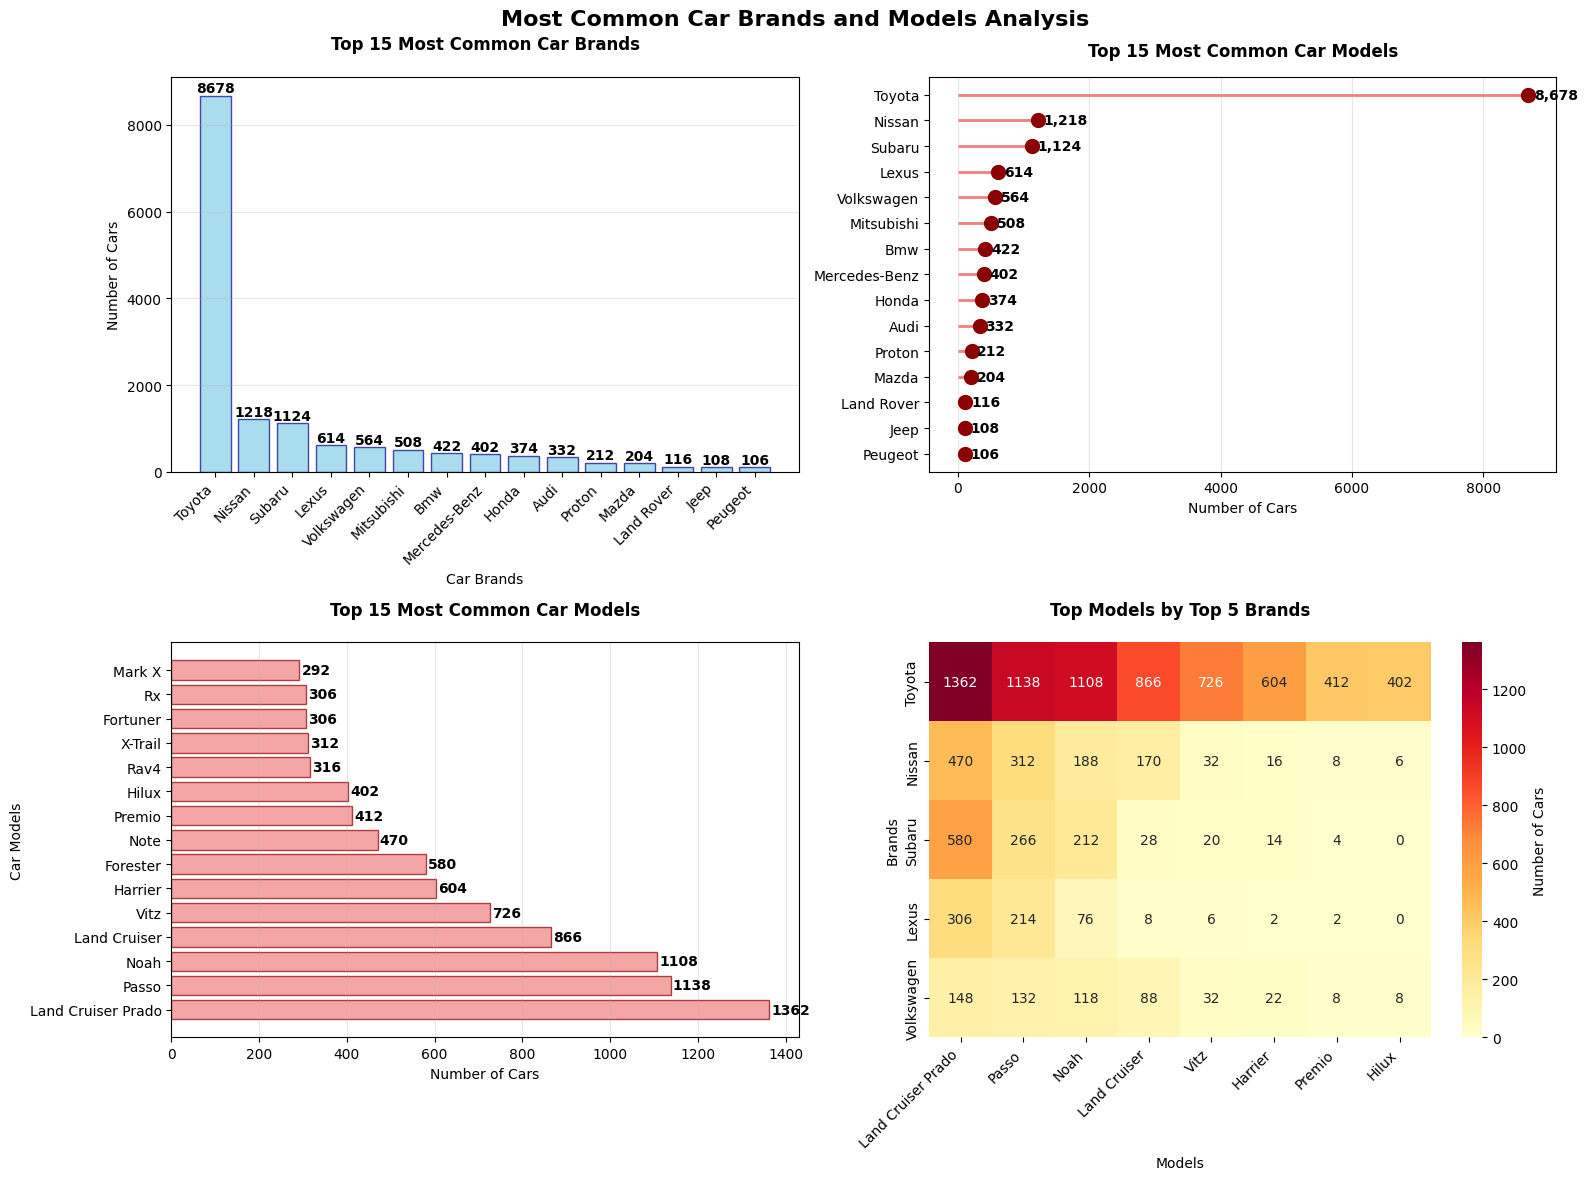

In [5]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Most Common Car Brands and Models Analysis', fontsize=16, fontweight='bold')

# 1. Most Common Brands
# print("=== MOST COMMON CAR BRANDS ===")
brand_counts = df['make'].value_counts()
# print(f"Total unique brands: {len(brand_counts)}")
# print("\nTop 15 most common brands:")
# print(brand_counts.head(15))

# Plot top 15 brands
top_brands = brand_counts.head(15)
ax1 = axes[0, 0]
bars1 = ax1.bar(range(len(top_brands)), top_brands.values, color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_title('Top 15 Most Common Car Brands', fontweight='bold', pad=20)
ax1.set_xlabel('Car Brands')
ax1.set_ylabel('Number of Cars')
ax1.set_xticks(range(len(top_brands)))
ax1.set_xticklabels(top_brands.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax1.grid(axis='y', alpha=0.3)

# 2. Market Share Analysis
# print(f"\n=== MARKET SHARE ANALYSIS ===")
# total_cars = len(df)
# market_share = (brand_counts / total_cars * 100).round(2)
# print("Top 10 brands by market share:")
# for brand, share in market_share.head(10).items():
#     print(f"{brand:<12}: {share:>5.1f}% ({brand_counts[brand]:,} cars)")

# Pie chart for top 10 brands
y_pos = list(range(len(top_brands)))
ax2 = axes[0, 1]
ax2.hlines(y=y_pos, xmin=0, xmax=top_brands.values, color='lightcoral', linewidth=2)
ax2.scatter(top_brands.values, y_pos, color='darkred', s=100, zorder=3)

# annotate counts
for x, y in zip(top_brands.values, y_pos):
    ax2.text(x + max(top_brands.values)*0.01, y,
            f"{x:,}", va='center', fontweight='bold')

# formatting
ax2.set_yticks(y_pos)
ax2.set_yticklabels(top_brands.index)
ax2.invert_yaxis()  # largest at top
ax2.set_xlabel("Number of Cars")
ax2.set_title("Top 15 Most Common Car Models", fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3)

# 3. Most Common Models Overall
# print(f"\n=== MOST COMMON CAR MODELS (OVERALL) ===")
model_counts = df['model'].value_counts()
# print(f"Total unique models: {len(model_counts)}")
# print("\nTop 15 most common models:")
# print(model_counts.head(15))

# Plot top 15 models
top_models = model_counts.head(15)
ax3 = axes[1, 0]
bars3 = ax3.barh(range(len(top_models)), top_models.values, color='lightcoral', edgecolor='darkred', alpha=0.7)
ax3.set_title('Top 15 Most Common Car Models', fontweight='bold', pad=20)
ax3.set_xlabel('Number of Cars')
ax3.set_ylabel('Car Models')
ax3.set_yticks(range(len(top_models)))
ax3.set_yticklabels(top_models.index)

# Add value labels on bars
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 5, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', fontweight='bold')

ax3.grid(axis='x', alpha=0.3)

# 4. Brand-Model Combinations
# print(f"\n=== MOST COMMON BRAND-MODEL COMBINATIONS ===")
brand_model_counts = df.groupby(['make', 'model']).size().sort_values(ascending=False)
# print("Top 15 brand-model combinations:")
# print(brand_model_counts.head(15))

# Create a heatmap for top brands and their models
ax4 = axes[1, 1]
top_5_brands = brand_counts.head(5).index

# Create pivot table for heatmap
heatmap_data = []
for brand in top_5_brands:
    brand_models = df[df['make'] == brand]['model'].value_counts().head(8)
    heatmap_data.append(brand_models)

# Convert to DataFrame for heatmap
max_len = max(len(models) for models in heatmap_data)
heatmap_matrix = []
model_names = []

for i, brand_models in enumerate(heatmap_data):
    row = [0] * max_len
    if i == 0:  # First brand - collect model names
        model_names = list(brand_models.index)
        for j, (model, count) in enumerate(brand_models.items()):
            row[j] = count
    else:  # Other brands - align with first brand's models or add new ones
        for j, (model, count) in enumerate(brand_models.items()):
            if j < max_len:
                row[j] = count
    heatmap_matrix.append(row[:len(model_names) if model_names else max_len])

# Adjust model_names length to match matrix
if model_names:
    model_names = model_names[:len(heatmap_matrix[0])]
else:
    model_names = [f'Model_{i+1}' for i in range(len(heatmap_matrix[0]))]

# Create DataFrame and plot heatmap
if heatmap_matrix and len(heatmap_matrix[0]) > 0:
    heatmap_df = pd.DataFrame(heatmap_matrix, 
                             index=top_5_brands, 
                             columns=model_names)
    
    sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlOrRd', 
                ax=ax4, cbar_kws={'label': 'Number of Cars'})
    ax4.set_title('Top Models by Top 5 Brands', fontweight='bold', pad=20)
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Brands')
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
else:
    ax4.text(0.5, 0.5, 'Insufficient data for heatmap', 
             transform=ax4.transAxes, ha='center', va='center')
    ax4.set_title('Brand-Model Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

# # 5. Detailed Analysis by Top Brands
# print(f"\n=== DETAILED MODEL BREAKDOWN FOR TOP 5 BRANDS ===")
# for brand in top_5_brands:
#     brand_data = df[df['make'] == brand]
#     brand_models = brand_data['model'].value_counts()
#     print(f"\n--- {brand.upper()} ({len(brand_data):,} cars) ---")
#     print(f"Number of different models: {len(brand_models)}")
#     print("Top models:")
#     for model, count in brand_models.head(8).items():
#         percentage = count / len(brand_data) * 100
#         print(f"  {model:<15}: {count:>4} cars ({percentage:>5.1f}%)")

# # 6. Summary Statistics
# print(f"\n=== SUMMARY STATISTICS ===")
# print(f"📊 Dataset Overview:")
# print(f"   • Total cars: {len(df):,}")
# print(f"   • Unique brands: {len(brand_counts)}")
# print(f"   • Unique models: {len(model_counts)}")
# print(f"   • Unique brand-model combinations: {len(brand_model_counts)}")

# print(f"\n📈 Market Concentration:")
# top_3_share = market_share.head(3).sum()
# top_5_share = market_share.head(5).sum()
# top_10_share = market_share.head(10).sum()
# print(f"   • Top 3 brands control: {top_3_share:.1f}% of market")
# print(f"   • Top 5 brands control: {top_5_share:.1f}% of market")
# print(f"   • Top 10 brands control: {top_10_share:.1f}% of market")

# print(f"\n🏆 Winners:")
# print(f"   • Most popular brand: {brand_counts.index[0]} ({brand_counts.iloc[0]:,} cars)")
# print(f"   • Most popular model: {model_counts.index[0]} ({model_counts.iloc[0]:,} cars)")
# if len(brand_model_counts) > 0:
#     top_combo = brand_model_counts.index[0]
#     print(f"   • Most popular combination: {top_combo[0]} {top_combo[1]} ({brand_model_counts.iloc[0]:,} cars)")

# print("\n✅ Task 1 Complete: Brand and Model Analysis Done!")

## Analyze the distribution of car prices.

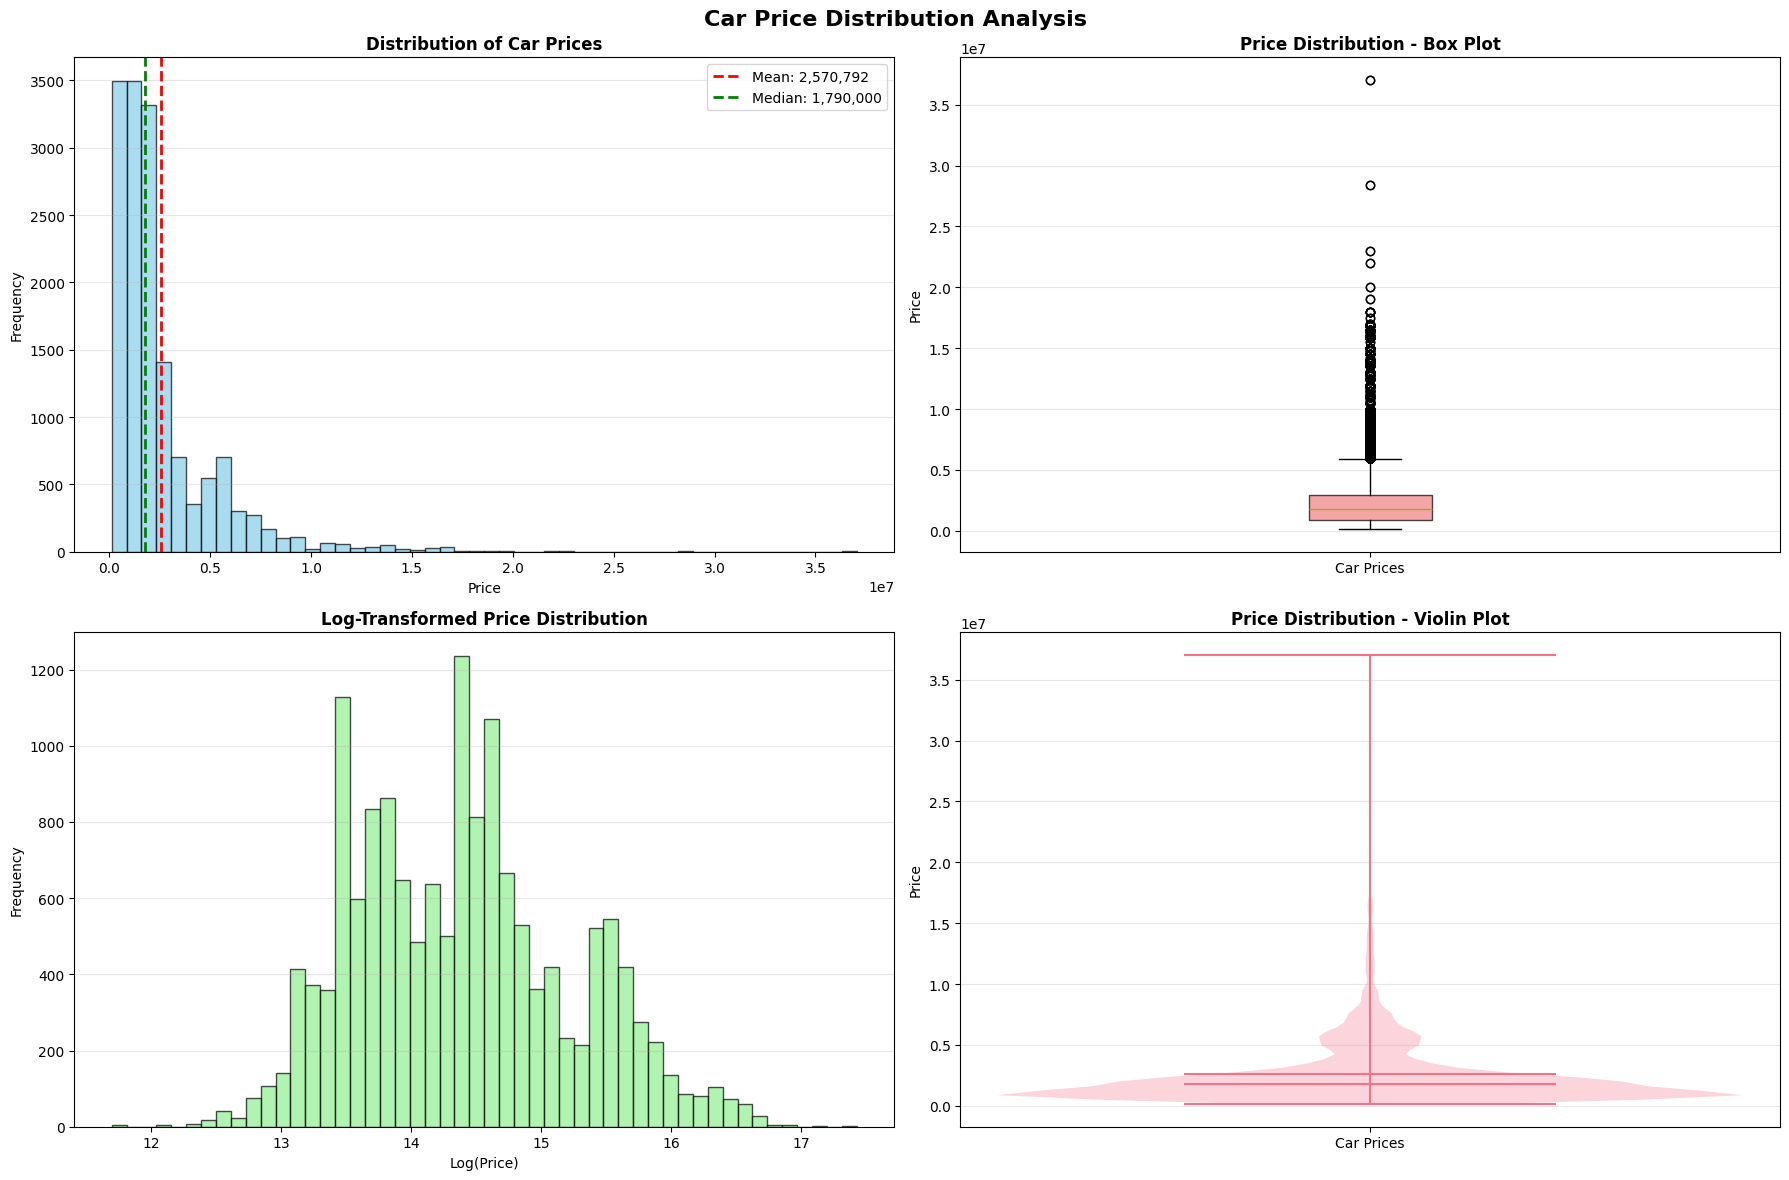

In [7]:
# Set up the plotting
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Car Price Distribution Analysis', fontsize=16, fontweight='bold')

# Basic price statistics
# print("=== BASIC PRICE STATISTICS ===")
# price_stats = df['price'].describe()
# print(price_stats)

# print(f"\nAdditional statistics:")
# print(f"Range: {df['price'].min():,.0f} - {df['price'].max():,.0f}")
# print(f"Interquartile Range (IQR): {df['price'].quantile(0.75) - df['price'].quantile(0.25):,.0f}")
# print(f"Coefficient of Variation: {df['price'].std() / df['price'].mean():.2f}")

# 1. Histogram of prices
ax1 = axes[0, 0]
ax1.hist(df['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Car Prices', fontweight='bold')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.3)

# Add vertical lines for mean and median
mean_price = df['price'].mean()
median_price = df['price'].median()
ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:,.0f}')
ax1.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:,.0f}')
ax1.legend()

# 2. Box plot to show outliers
ax2 = axes[0, 1]
box_plot = ax2.boxplot(df['price'], patch_artist=True, tick_labels=['Car Prices'])
box_plot['boxes'][0].set_facecolor('lightcoral')
box_plot['boxes'][0].set_alpha(0.7)
ax2.set_title('Price Distribution - Box Plot', fontweight='bold')
ax2.set_ylabel('Price')
ax2.grid(axis='y', alpha=0.3)

# 3. Log-transformed histogram (to see if price is log-normal)
ax3 = axes[1, 0]
log_prices = np.log(df['price'])
ax3.hist(log_prices, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_title('Log-Transformed Price Distribution', fontweight='bold')
ax3.set_xlabel('Log(Price)')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', alpha=0.3)

# 4. Violin plot for better distribution shape
ax4 = axes[1, 1]
violin_parts = ax4.violinplot([df['price']], positions=[1], widths=0.6, showmeans=True, showmedians=True)
ax4.set_title('Price Distribution - Violin Plot', fontweight='bold')
ax4.set_ylabel('Price')
ax4.set_xticks([1])
ax4.set_xticklabels(['Car Prices'])
ax4.grid(axis='y', alpha=0.3)



plt.tight_layout()
plt.show()

# # Detailed Analysis
# print(f"\n=== DETAILED PRICE ANALYSIS ===")

# # Price ranges
# def categorize_price(price):
#     if price < 500000:
#         return 'Budget (<500K)'
#     elif price < 1000000:
#         return 'Mid-range (500K-1M)'
#     elif price < 2000000:
#         return 'Premium (1M-2M)'
#     elif price < 3000000:
#         return 'Luxury (2M-3M)'
#     else:
#         return 'Ultra-luxury (>3M)'

# df['price_category'] = df['price'].apply(categorize_price)
# price_category_counts = df['price_category'].value_counts()

# print("Price category distribution:")
# for category, count in price_category_counts.items():
#     percentage = count / len(df) * 100
#     avg_price = df[df['price_category'] == category]['price'].mean()
#     print(f"{category:<20}: {count:>5} cars ({percentage:>5.1f}%) - Avg: {avg_price:>8,.0f}")

# # Outlier analysis
# print(f"\n=== OUTLIER ANALYSIS ===")
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
# print(f"Number of outliers (IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
# print(f"Outlier bounds: {lower_bound:,.0f} - {upper_bound:,.0f}")

# if len(outliers) > 0:
#     print(f"\nExtreme outliers (sample):")
#     extreme_outliers = outliers.nlargest(5, 'price')[['make', 'model', 'year', 'price']]
#     print(extreme_outliers)

# # Statistical tests
# print(f"\n=== NORMALITY TESTS ===")

# # Shapiro-Wilk test (for small samples, we'll use a subset)
# sample_size = min(5000, len(df))
# price_sample = df['price'].sample(sample_size, random_state=42)
# shapiro_stat, shapiro_p = stats.shapiro(price_sample)
# print(f"Shapiro-Wilk test (n={sample_size}):")
# print(f"  Statistic: {shapiro_stat:.6f}")
# print(f"  p-value: {shapiro_p:.2e}")
# print(f"  Normal distribution: {'No' if shapiro_p < 0.05 else 'Yes'} (α=0.05)")

# # Anderson-Darling test
# anderson_result = stats.anderson(df['price'], dist='norm')
# print(f"\nAnderson-Darling test:")
# print(f"  Statistic: {anderson_result.statistic:.6f}")
# print(f"  Critical values: {anderson_result.critical_values}")
# print(f"  Significance levels: {anderson_result.significance_level}")

# # Skewness and Kurtosis
# skewness = stats.skew(df['price'])
# kurtosis = stats.kurtosis(df['price'])
# print(f"\n=== DISTRIBUTION SHAPE ===")
# print(f"Skewness: {skewness:.3f}")
# if skewness > 1:
#     skew_desc = "highly right-skewed"
# elif skewness > 0.5:
#     skew_desc = "moderately right-skewed"
# elif skewness > -0.5:
#     skew_desc = "approximately symmetric"
# elif skewness > -1:
#     skew_desc = "moderately left-skewed"
# else:
#     skew_desc = "highly left-skewed"
# print(f"  Interpretation: {skew_desc}")

# print(f"Kurtosis: {kurtosis:.3f}")
# if kurtosis > 0:
#     kurt_desc = "heavy-tailed (leptokurtic)"
# elif kurtosis < 0:
#     kurt_desc = "light-tailed (platykurtic)"
# else:
#     kurt_desc = "normal-tailed (mesokurtic)"
# print(f"  Interpretation: {kurt_desc}")

# # Price by different segments
# print(f"\n=== PRICE INSIGHTS ===")

# # Most expensive cars
# print("Most expensive cars:")
# expensive_cars = df.nlargest(5, 'price')[['make', 'model', 'year', 'price', 'mileage_imputed']]
# for idx, row in expensive_cars.iterrows():
#     print(f"  {row['make']} {row['model']} {row['year']} - {row['price']:,} (Mileage: {row['mileage_imputed']:,.0f})")

# # Least expensive cars
# print(f"\nLeast expensive cars:")
# cheap_cars = df.nsmallest(5, 'price')[['make', 'model', 'year', 'price', 'mileage_imputed']]
# for idx, row in cheap_cars.iterrows():
#     print(f"  {row['make']} {row['model']} {row['year']} - {row['price']:,} (Mileage: {row['mileage_imputed']:,.0f})")

# print(f"\n=== SUMMARY ===")
# print(f"📊 Price Distribution Characteristics:")
# print(f"   • Mean price: {mean_price:,.0f}")
# print(f"   • Median price: {median_price:,.0f}")
# print(f"   • Standard deviation: {df['price'].std():,.0f}")
# print(f"   • Distribution: {skew_desc}")
# print(f"   • Outliers: {len(outliers)} cars ({len(outliers)/len(df)*100:.1f}%)")
# print(f"   • Price range: {df['price'].min():,.0f} - {df['price'].max():,.0f}")

# print(f"\n💡 Key Insights:")
# print(f"   • {'Median < Mean' if median_price < mean_price else 'Median ≥ Mean'} suggests {'right-skewed' if median_price < mean_price else 'left-skewed or symmetric'} distribution")
# print(f"   • Most cars ({price_category_counts.iloc[0]} cars) are in the '{price_category_counts.index[0]}' category")
# print(f"   • Price distribution is {'not ' if shapiro_p < 0.05 else ''}normally distributed")

# print("\n✅ Task 2 Complete: Price Distribution Analysis Done!")

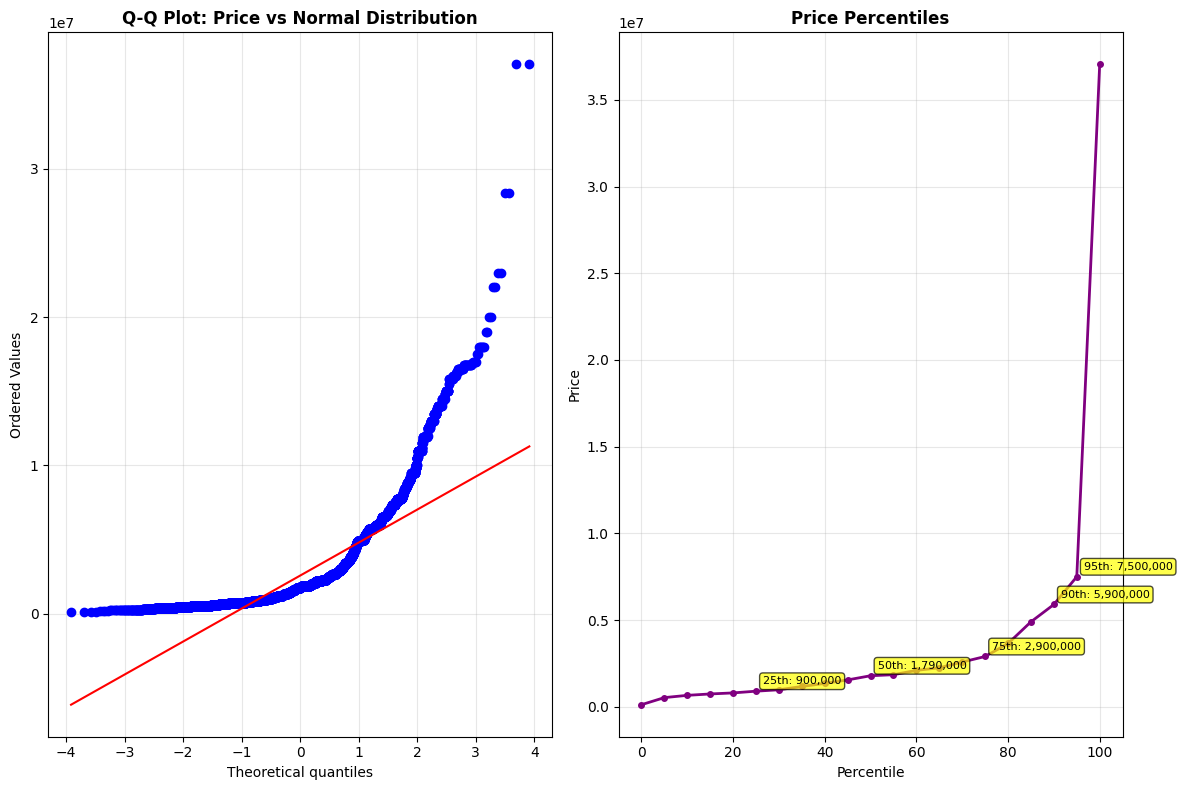

In [8]:
plt.style.use('default')
sns.set_palette("husl")
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

#5. Q-Q plot to test normality
ax5 = axes[0]
stats.probplot(df['price'], dist="norm", plot=ax5)
ax5.set_title('Q-Q Plot: Price vs Normal Distribution', fontweight='bold')
ax5.grid(alpha=0.3)

# 6. Price percentiles
ax6 = axes[1]
percentiles = np.arange(0, 101, 5)
price_percentiles = [df['price'].quantile(p/100) for p in percentiles]
ax6.plot(percentiles, price_percentiles, marker='o', linewidth=2, markersize=4, color='purple')
ax6.set_title('Price Percentiles', fontweight='bold')
ax6.set_xlabel('Percentile')
ax6.set_ylabel('Price')
ax6.grid(alpha=0.3)

# Add annotations for key percentiles
key_percentiles = [25, 50, 75, 90, 95]
for p in key_percentiles:
    price_val = df['price'].quantile(p/100)
    ax6.annotate(f'{p}th: {price_val:,.0f}', 
                xy=(p, price_val), xytext=(5, 5), 
                textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show();

## Compare how mileage varies across car brands

Analyzing mileage patterns for top 10 brands:
Brands: Toyota, Nissan, Subaru, Lexus, Volkswagen, Mitsubishi, Bmw, Mercedes‑Benz, Honda, Audi

=== MILEAGE STATISTICS BY BRAND ===
Brand-wise mileage statistics:
               count      mean    median       std      min        max
make                                                                  
Audi             332   92043.0   83173.0   60887.0  17900.0   750000.0
Bmw              422  114370.0   95000.0  189203.0  11532.0  2000000.0
Honda            374  107559.0   89000.0  107958.0  12000.0  1000000.0
Lexus            614   76665.0   80000.0   30666.0  13256.0   207724.0
Mercedes‑Benz    402   79983.0   68000.0  104265.0  16000.0   890000.0
Mitsubishi       508  127679.0  120000.0   96782.0  30000.0  1250000.0
Nissan          1218  130109.0  121008.0   58884.0  31000.0   995802.0
Subaru          1124  148590.0   89000.0  225510.0  25000.0  1260000.0
Toyota          8678  108043.0   85000.0  104849.0      0.0  2000000.0
Volkswagen

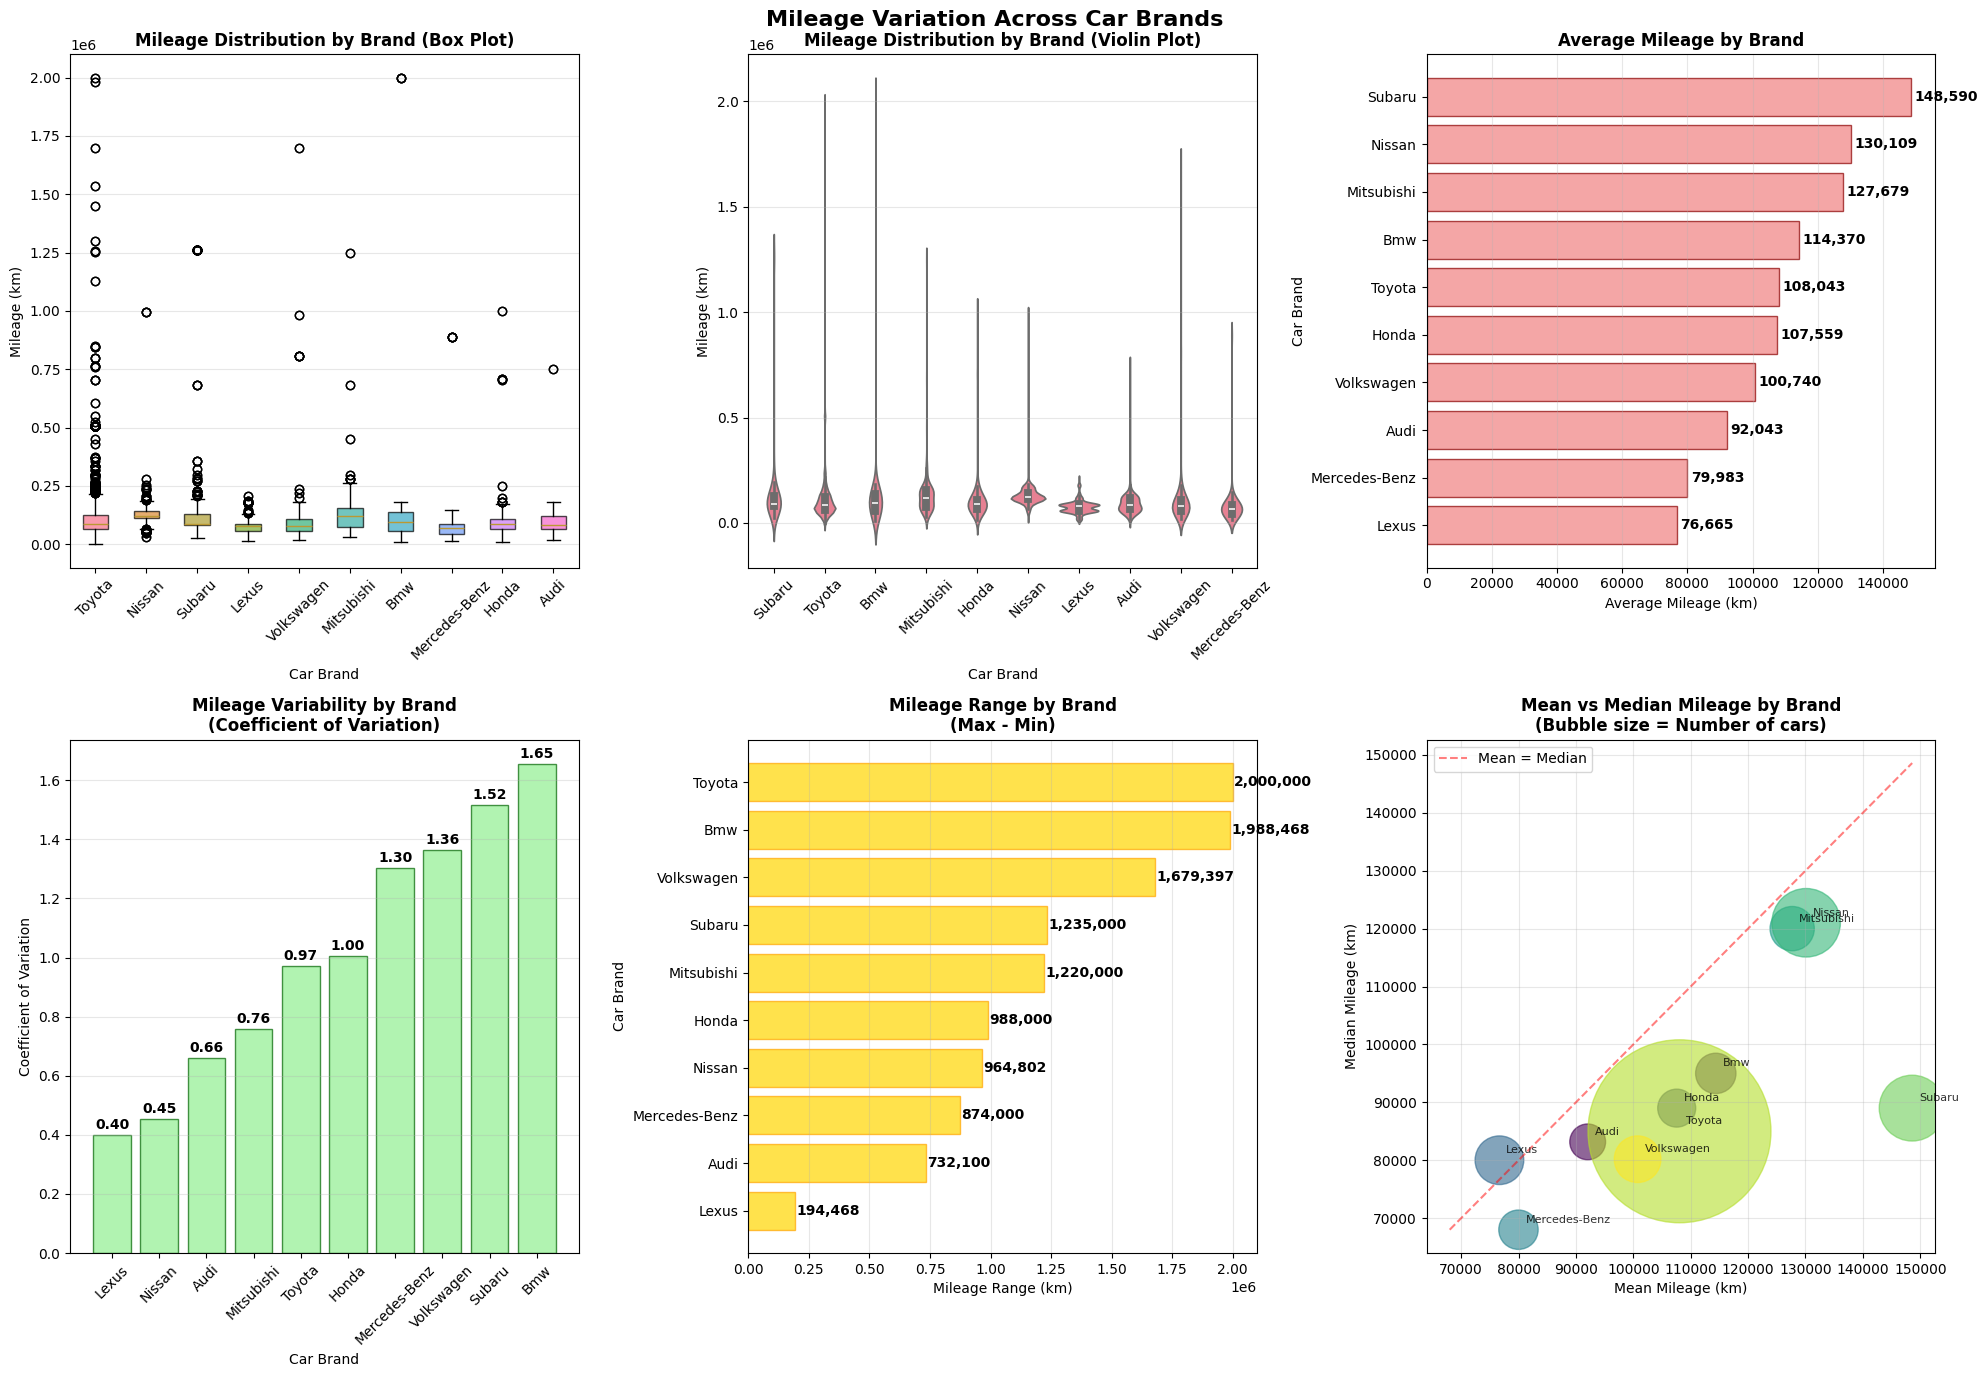


=== STATISTICAL ANALYSIS ===
One-way ANOVA test:
  F-statistic: 28.3701
  p-value: 2.2e-49


In [9]:
# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# Get top brands for focused analysis
top_brands = df['make'].value_counts().head(10).index
df_top_brands = df[df['make'].isin(top_brands)].copy()

print(f"Analyzing mileage patterns for top {len(top_brands)} brands:")
print(f"Brands: {', '.join(top_brands)}")

# Basic mileage statistics by brand
print(f"\n=== MILEAGE STATISTICS BY BRAND ===")
mileage_by_brand = df_top_brands.groupby('make')['mileage_imputed'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)

print("Brand-wise mileage statistics:")
print(mileage_by_brand)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Mileage Variation Across Car Brands', fontsize=16, fontweight='bold')

# 1. Box plot comparing mileage across brands
ax1 = axes[0, 0]
box_data = [df_top_brands[df_top_brands['make'] == brand]['mileage_imputed'].values 
            for brand in top_brands]
box_plot = ax1.boxplot(box_data, tick_labels=top_brands, patch_artist=True)

# Color the boxes
colors = sns.color_palette("husl", len(top_brands))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Mileage Distribution by Brand (Box Plot)', fontweight='bold')
ax1.set_xlabel('Car Brand')
ax1.set_ylabel('Mileage (km)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 2. Violin plot for better distribution visualization
ax2 = axes[0, 1]
sns.violinplot(data=df_top_brands, x='make', y='mileage_imputed', ax=ax2)
ax2.set_title('Mileage Distribution by Brand (Violin Plot)', fontweight='bold')
ax2.set_xlabel('Car Brand')
ax2.set_ylabel('Mileage (km)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Average mileage by brand (bar chart)
ax3 = axes[0, 2]
avg_mileage = mileage_by_brand['mean'].sort_values(ascending=True)
bars = ax3.barh(range(len(avg_mileage)), avg_mileage.values, 
                color='lightcoral', edgecolor='darkred', alpha=0.7)
ax3.set_title('Average Mileage by Brand', fontweight='bold')
ax3.set_xlabel('Average Mileage (km)')
ax3.set_ylabel('Car Brand')
ax3.set_yticks(range(len(avg_mileage)))
ax3.set_yticklabels(avg_mileage.index)
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width + 1000, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

# 4. Mileage variability (coefficient of variation)
ax4 = axes[1, 0]
cv_by_brand = (mileage_by_brand['std'] / mileage_by_brand['mean']).sort_values(ascending=True)
bars4 = ax4.bar(range(len(cv_by_brand)), cv_by_brand.values, 
                color='lightgreen', edgecolor='darkgreen', alpha=0.7)
ax4.set_title('Mileage Variability by Brand\n(Coefficient of Variation)', fontweight='bold')
ax4.set_xlabel('Car Brand')
ax4.set_ylabel('Coefficient of Variation')
ax4.set_xticks(range(len(cv_by_brand)))
ax4.set_xticklabels(cv_by_brand.index, rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 5. Range (max - min) by brand
ax5 = axes[1, 1]
range_by_brand = (mileage_by_brand['max'] - mileage_by_brand['min']).sort_values(ascending=True)
bars5 = ax5.barh(range(len(range_by_brand)), range_by_brand.values, 
                 color='gold', edgecolor='orange', alpha=0.7)
ax5.set_title('Mileage Range by Brand\n(Max - Min)', fontweight='bold')
ax5.set_xlabel('Mileage Range (km)')
ax5.set_ylabel('Car Brand')
ax5.set_yticks(range(len(range_by_brand)))
ax5.set_yticklabels(range_by_brand.index)
ax5.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(width + 5000, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

# 6. Scatter plot: Brand vs Average Mileage with car count
ax6 = axes[1, 2]
brand_stats = mileage_by_brand.reset_index()
scatter = ax6.scatter(brand_stats['mean'], brand_stats['median'], 
                     s=brand_stats['count']*2, alpha=0.6, 
                     c=range(len(brand_stats)), cmap='viridis')
ax6.set_title('Mean vs Median Mileage by Brand\n(Bubble size = Number of cars)', fontweight='bold')
ax6.set_xlabel('Mean Mileage (km)')
ax6.set_ylabel('Median Mileage (km)')
ax6.grid(alpha=0.3)

# Add brand labels
for i, row in brand_stats.iterrows():
    ax6.annotate(row['make'], (row['mean'], row['median']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.8)

# Add diagonal line (mean = median)
min_val = min(brand_stats['mean'].min(), brand_stats['median'].min())
max_val = max(brand_stats['mean'].max(), brand_stats['median'].max())
ax6.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Mean = Median')
ax6.legend()

plt.tight_layout()
plt.show()

# Statistical Analysis
print(f"\n=== STATISTICAL ANALYSIS ===")

# ANOVA test to check if there are significant differences between brands
brand_groups = [df_top_brands[df_top_brands['make'] == brand]['mileage_imputed'].values 
                for brand in top_brands]
f_stat, p_value = stats.f_oneway(*brand_groups)

print(f"One-way ANOVA test:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {p_value:.2}")

## Explore the relationship between car age, mileage, and price.

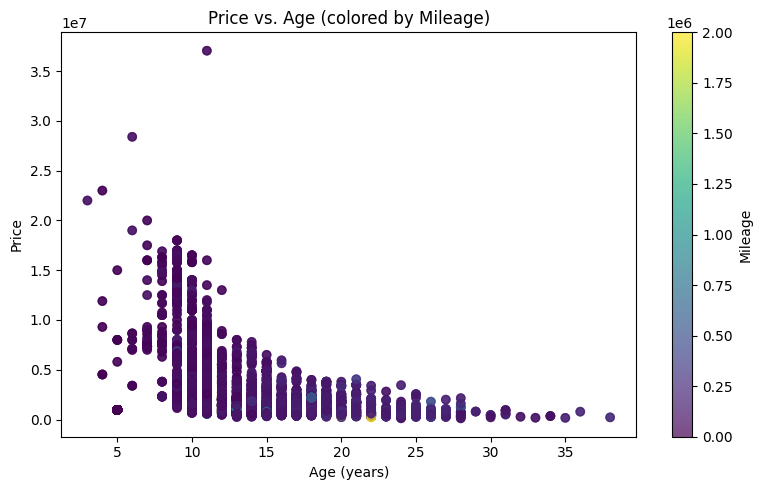

In [10]:
plt.figure(figsize=(8,5))
sc = plt.scatter(df['car_age'], df['price'], c=df['mileage_imputed'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Mileage')
plt.title('Price vs. Age (colored by Mileage)')
plt.xlabel('Age (years)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


## Check for price differences between transmission types.

                count          mean           std       min        25%  \
transmission                                                             
Automatic     14528.0  2.612607e+06  2.676691e+06  120000.0   895000.0   
Manual          836.0  1.844133e+06  1.500012e+06  125000.0  1250000.0   

                    50%        75%         max  
transmission                                    
Automatic     1750000.0  3000000.0  37049000.0  
Manual        1850000.0  2200000.0  18000000.0   



<Figure size 800x500 with 0 Axes>

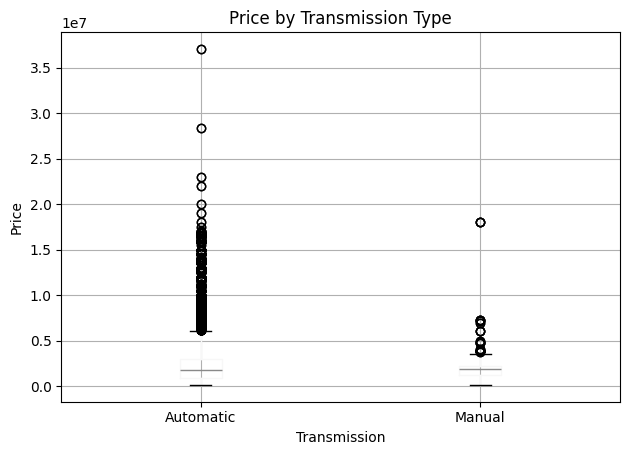

In [11]:
print(df.groupby('transmission')['price'].describe(), "\n")

# Side‑by‑side boxplots
plt.figure(figsize=(8,5))
df.boxplot(column='price', by='transmission')
plt.title('Price by Transmission Type')
plt.suptitle('')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.tight_layout()
plt.show();